In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression

# 1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–í –∫–∞—á–µ—Å—Ç–≤–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –±–µ—Ä–µ–º —Å—Ç–æ–ª–±–µ—Ü `total_cases`. –í –∫–∞—á–µ—Å—Ç–≤–µ —Ç—Ä–µ–π–Ω–∞ –±–µ—Ä–µ–º –ø–µ—Ä–≤—ã–µ 50 –¥–Ω–µ–π, –Ω–∞—á–∏–Ω–∞—è —Å 3 –º–∞—Ä—Ç–∞ 2020, –¥–ª—è —Ç–µ—Å—Ç–∞ –±–µ—Ä–µ–º —Å–ª–µ–¥—É—é—â–∏–µ –ø–æ—Å–ª–µ —Ç—Ä–µ–π–Ω–∞ 100 –¥–Ω–µ–π. –ë—ã–ª–æ —Ä–µ—à–µ–Ω–æ –Ω–µ –±—Ä–∞—Ç—å –≤—Å–µ –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –¥–Ω–∏ –¥–ª—è —Ç–µ—Å—Ç–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ –≤ —ç—Ç–æ–º –Ω–µ—Ç —Å–º—ã—Å–ª–∞, —Ç–∞–∫ –∫–∞–∫ –≤ –±—É–¥—É—â–µ–º –±—É–¥–µ—Ç –µ—â–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–∏–∫–æ–≤ —Ä–æ—Å—Ç–∞ –∑–∞–±–æ–ª–µ–≤–∞–µ–º–æ—Å—Ç–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ–ª—å–∑—è –æ–ø–∏—Å–∞—Ç—å, —Ä–∞—Å–ø–æ–ª–∞–≥–∞—è —Ç–æ–ª—å–∫–æ –¥–∞–Ω–Ω—ã–º–∏ –Ω–∞ –ø–µ—Ä–≤–µ 50 –¥–Ω–µ–π.

In [2]:
data_all = pd.read_csv('owid-covid-data.csv')
data = data_all.copy()

In [3]:
data = data[data['location'] == 'Russia']
data.date = pd.to_datetime(data.date)
data = data[data.date >= pd.to_datetime('2020-03-03')]
total_cases = data['total_cases'].values
new_cases = data['new_cases'].apply(lambda x: x + 1 if x == 0 else x).values.astype(int)
x = np.arange(1, total_cases.shape[0] + 1, dtype=float).reshape(-1, 1)
dates = data.date.values

total_cases_train = total_cases[:50]
new_cases_train = new_cases[:50]
x_train = x[:50]
dates_train = dates[:50]

n = 150
total_cases_test = total_cases[50:n]
new_cases_test = new_cases[50:n]
x_test = x[50:n]
dates_test = dates[50:n]

# 2. –≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å

–ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ —Ü–µ–ª–µ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –Ω–∞ —Ç—Ä–µ–π–Ω–µ –∏ —Ç–µ—Å—Ç–µ.

In [4]:
def plot_target(x, y, title):
    plt.figure(figsize=(10, 5))
    plt.scatter(x, y)
    plt.title(title, fontsize=20)
    plt.xlabel('day', fontsize=15)
    plt.ylabel(title, fontsize=15)
    plt.grid()

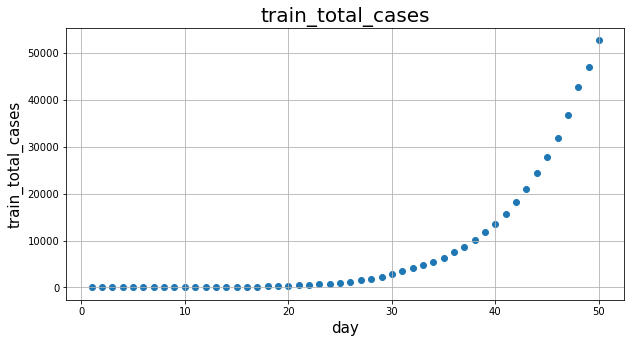

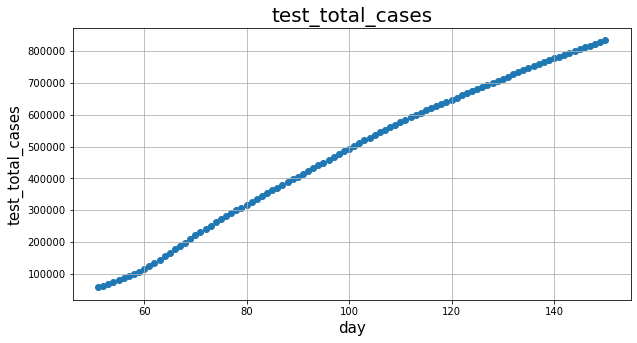

In [5]:
plot_target(x_train, total_cases_train, 'train_total_cases')
plot_target(x_test, total_cases_test, 'test_total_cases')

### 2.1 –û–±—É—á–µ–Ω–∏–µ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏.

–û–±—É—á–∏–º –º–æ–¥–µ–ª—å —Å —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–º —Ä–æ—Å—Ç–æ–º —á–∏—Å–ª–∞ –∑–∞–±–æ–ª–µ–≤—à–∏—Ö:

$$
y = exp(w_0 + x*w_1)
$$

$$
y - \text{—á–∏—Å–ª–æ –∑–∞–±–æ–ª–µ–≤—à–∏—Ö} \\
x - \text{–Ω–æ–º–µ—Ä —Ç–µ–∫—É—â–µ–≥–æ –¥–Ω—è}
$$

–î–ª—è —ç—Ç–æ–≥–æ –≤–æ–∑–≤–º–µ–º –ª–æ–≥–∞—Ä–∏—Ñ–º –æ—Ç –ø—Ä–∞–≤–æ–π –∏ –ª–µ–≤–æ–π —á–∞—Å—Ç–µ–π –≤—ã—Ä–∞–∂–µ–Ω–∏—è:

$$
ln(y) = ln(exp(w_0 + x*w_1)) \\
ln(y) = w_0 + x*w_1
$$

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–±—É—á–∏—Ç—å –æ–±—ã—á–Ω—É—é –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –Ω–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ $ln(y)$.


In [6]:
model_exp = LinearRegression().fit(x_train, np.log(total_cases_train))

In [7]:
pred_train_exp = np.exp(model_exp.predict((x_train)))
pred_test_exp = np.exp(model_exp.predict((x_test)))

In [8]:
def plot_target_model(x, y, pred, title):
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    for i in range(2):
        if i == 0:
            ax[i].set_title(title, fontsize=20)
            ax[i].scatter(x, y, label='true values', c='b')
            ax[i].plot(x, pred, label='prediction', c='r')
        else:
            ax[i].set_title(title + '_log_scale', fontsize=20)
            ax[i].scatter(x, np.log(y), label='true values', c='b')
            ax[i].plot(x, np.log(pred), label='prediction', c='r')
        ax[i].set_ylabel(title, fontsize=15)
        ax[i].set_xlabel('day', fontsize=15)
        ax[i].grid()
        ax[i].legend(fontsize=15)

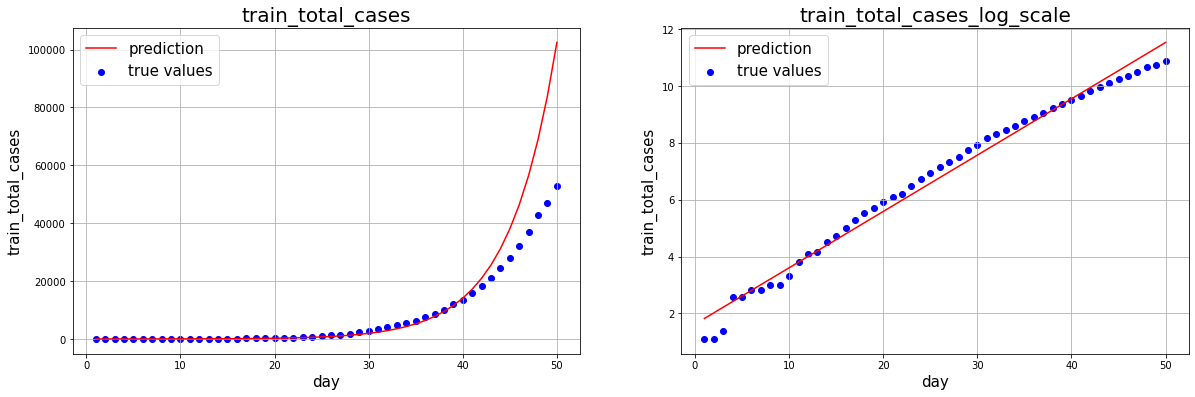

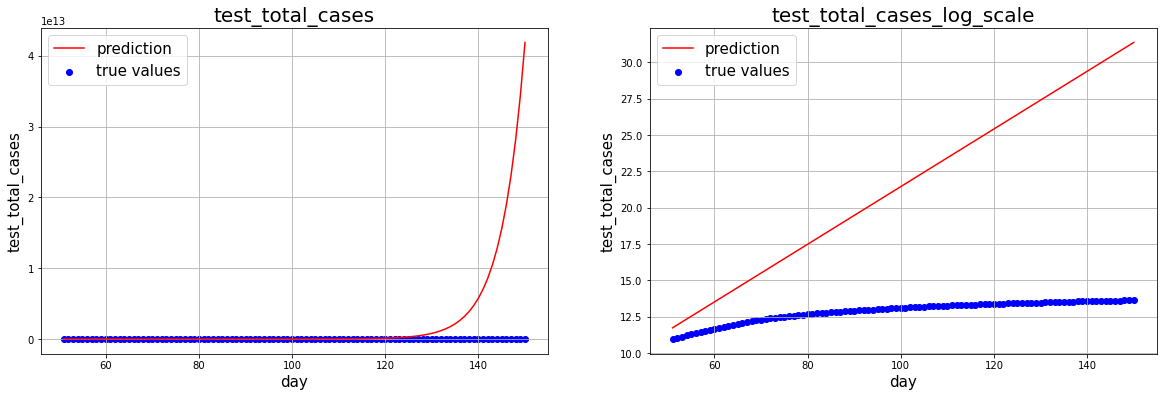

In [9]:
plot_target_model(x_train, total_cases_train, pred_train_exp, 'train_total_cases')
plot_target_model(x_test, total_cases_test, pred_test_exp, 'test_total_cases')

–í–∏–¥–Ω–æ, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–∞ –Ω–µ–±–æ–ª—å—à–∏—Ö $x$ –Ω–µ–ø–ª–æ—Ö–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ, –æ–¥–Ω–∞–∫–æ –¥–∞–ª—å—à–µ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ —Ä–∞—Å—Ç–µ—Ç –∏ —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –Ω–µ —Å–æ–æ—Ç–Ω–æ—Å–∏—Ç—Å—è —Å –¥–∞–Ω–Ω—ã–º–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –Ω–∞ —Ç–µ—Å—Ç–µ.

### 2.2 –ü–æ–∏—Å–∫ –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

–ê–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–¥–∞–µ—Ç—Å—è –∫–∞–∫ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ –∞–ø—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–Ω–∏—è –∏ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è, –ø–æ—ç—Ç–æ–º—É —Å–Ω–∞—á–∞–ª–∞ –æ–ø—Ä–µ–¥–µ–ª–∏–º –∏—Ö.

–ê–ø—Ä–∏–æ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–¥–∞–¥–∏–º –∫–∞–∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏:

$$
\mu = 0 \\
\Sigma = \begin{bmatrix}5 & 0 \\ 0 & 5 \end{bmatrix}
$$

In [10]:
proir_mu = np.array([0, 0]) 
proir_sigma = 5 * np.array([[1, 0], [0, 1]])
w_0 = model_exp.intercept_
w_1 = model_exp.coef_[0]
z_model_exp = multivariate_normal.pdf([w_0, w_1], mean=proir_mu, cov=proir_sigma)
print(f'–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –≤–µ—Å–æ–≤ –º–æ–¥–µ–ª–∏ –≤ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–∏–∏ —Å –∞–ø—Ä–∏–æ—Ä–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: {z_model_exp:.5f}')

–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –≤–µ—Å–æ–≤ –º–æ–¥–µ–ª–∏ –≤ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–∏–∏ —Å –∞–ø—Ä–∏–æ—Ä–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: 0.02437


–ü–æ—Å—ç–º–ø–ª–∏—Ä—É–µ–º –ø—Ä—è–º—ã–µ –∏–∑ —ç—Ç–æ–≥–æ –∞–ø—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

In [11]:
def sample_lines(mu, sigma, x, y, limits, n=20):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    for i in range(2):
        if i == 0:
            ax[i].scatter(x, y, label='true values')
            ax[i].set_ylim(0, limits[0])
            ax[i].set_title('sampled_from_prior', fontsize=20)
            for w in my_w:
                ax[i].plot(x, np.exp(w[0] + w[1]*x), 'k-', lw=0.5)
        else:
            ax[i].scatter(x, np.log(y), label='true values')
            ax[i].set_ylim(0, limits[1])
            ax[i].set_title('sampled_from_prior_log_scale', fontsize=20)
            for w in my_w:
                ax[i].plot(x, w[0] + w[1]*x, 'k-', lw=0.5)
        ax[i].set_xlabel('x', fontsize=15)
        ax[i].set_ylabel('y', fontsize=15)
        ax[i].grid()
        ax[i].legend(loc='upper right')

<Figure size 864x432 with 0 Axes>

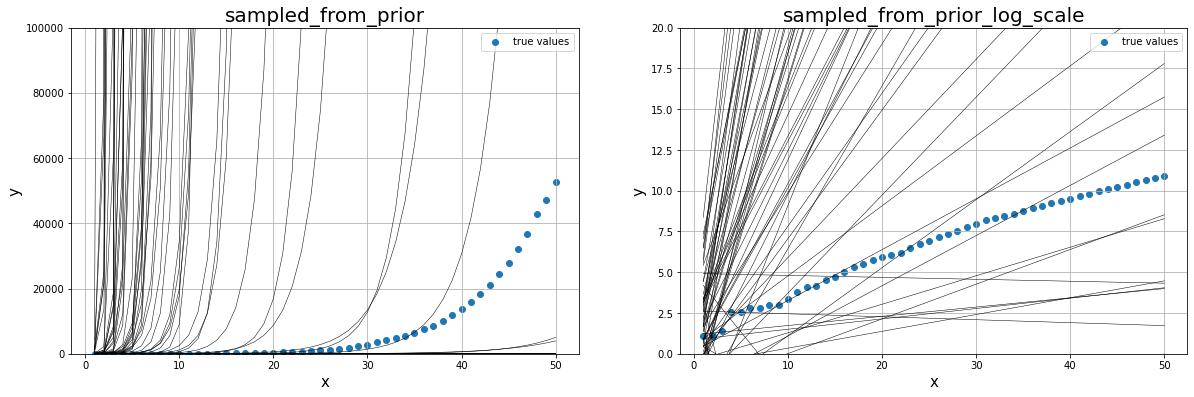

In [12]:
limits = [1e5, 20]
plt.figure(figsize=(12, 6))
sample_lines(proir_mu, proir_sigma, x_train, total_cases_train, limits, 100)

–ü–æ–ª—É—á–∞–µ–º –∫–∞–∫–æ–π-—Ç–æ –Ω–∞–±–æ—Ä —ç–∫—Å–ø–æ–Ω–µ–Ω—Ç –Ω–∏–∫–∞–∫ –Ω–µ —Å–æ–æ—Ç–Ω–æ—Å—è—â–∏—Ö—Å—è —Å –¥–∞–Ω–Ω—ã–º–∏. –ü—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏–µ $i$-–≥–æ –æ–±—ä–µ–∫—Ç–∞ —Ç–æ–∂–µ –∑–∞–¥–∞–¥–∏–º –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏:

$$
\mu = w_0 + w_1x_i\\
\sigma^2 - \text{–¥–∏—Å–ø–µ—Ä—Å–∏—è —à—É–º–∞, –∫–æ—Ç–æ—Ä—É—é –º–æ–∂–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å, –∏—Å–ø–æ–ª—å–∑—É—è –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å}
$$

–î–∏—Å–ø–µ—Ä—Å–∏—é –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –≤ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π —à–∫–∞–ª–µ, —Ç–∞–∫ –∫–∞–∫ –Ω–∞—à–∞ –ª–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç $ln(y)$.

In [13]:
std_noise = np.std(np.log(total_cases_train) - np.log(pred_train_exp))
print(f'–î–∏—Å–ø–µ—Ä—Å–∏—è —à—É–º–∞: {std_noise ** 2}')

–î–∏—Å–ø–µ—Ä—Å–∏—è —à—É–º–∞: 0.12183046154391239


–¢–µ–ø–µ—Ä—å –ø—É—Ç–µ–º –ø–µ—Ä–µ–º–Ω–æ–∂–µ–Ω–∏—è –∞–ø—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è –≤—Å–µ—Ö —Ç–æ—á–µ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø–æ–ª—É—á–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

In [14]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    x_matrix = np.array([[1, x[0]]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.log(np.array([y]))))
    return mu_n, sigma_n

In [15]:
post_mu, post_sigma = proir_mu, proir_sigma.copy()
for x, y in zip(x_train, total_cases_train):
    post_mu, post_sigma = bayesian_update(post_mu, post_sigma, x, y, std_noise)

In [16]:
print(f'–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏: \n w_0 = {w_0:.4f} \n w_1 = {w_1:.4f} \n\n')
print(f'–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (MAP): \n w_0 = {post_mu[0]:.4f} \n w_1 = {post_mu[1]:.4f}')

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏: 
 w_0 = 1.6224 
 w_1 = 0.1983 


–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (MAP): 
 w_0 = 1.6192 
 w_1 = 0.1984


–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ –∏ –ú–ê–† –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ —Å–æ–æ—Ç–Ω–æ—Å—è—Ç—Å—è.

### 2.3 –ü—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ 

–¢–µ–ø–µ—Ä—å –ø–æ—Å–µ–º–ø–ª–∏—Ä—É–µ–º –º–Ω–æ–∂–µ—Å—Ç–≤–æ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ç –∏–∑ –ø–æ–ª—É—á–∏–≤—à–µ–≥–æ—Å—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. MAP –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —è–≤–ª—è–µ—Ç—Å—è $\mu$, —Ç–∞–∫ –∫–∞–∫ –º—ã –≤–∑—è–ª–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ.

In [17]:
def sample_from_posterior(mu, sigma, x, y, pred, limits, title, dates=None, n=20):
    if dates is not None:
        x_axis = dates
    else:
        x_axis = x
    my_w = np.random.multivariate_normal(mu, sigma, n)
    fig, ax = plt.subplots(1, 2, figsize=(22, 7))
    for i in range(2):
        if i == 0:
            for j, w in enumerate(my_w):
                if j == 0:
                    ax[i].plot(x_axis, np.exp(w[0] + w[1]*x), 'aqua', label='sampled')
                else:
                    ax[i].plot(x_axis, np.exp(w[0] + w[1]*x), 'aqua', lw=0.3, alpha=0.4)
            ax[i].scatter(x_axis, y, label='true values')
            ax[i].plot(x_axis, pred, c='r', label='model prediction')
            ax[i].plot(x_axis, np.exp(mu[0] + mu[1]*x), c='orange', label='MAP')
            ax[i].set_ylim(0, limits[0])
            ax[i].set_title('sampled_from_posterior', fontsize=20)
        else:
            for j, w in enumerate(my_w):
                if j == 0:
                    ax[i].plot(x_axis, w[0] + w[1]*x, 'aqua', label='sampled')
                else:
                    ax[i].plot(x_axis, w[0] + w[1]*x, 'aqua', lw=0.3, alpha=0.4)
            ax[i].scatter(x_axis, np.log(y), label='true values')
            ax[i].plot(x_axis, np.log(pred), c='r', label='model prediction')
            ax[i].plot(x_axis, mu[0] + mu[1]*x, c='orange', label='MAP')
            ax[i].set_ylim(0, limits[1])
            ax[i].set_title('sampled_from_posterior_log_scale', fontsize=20)
        ax[i].set_xlabel('x', fontsize=15)
        ax[i].set_ylabel(title, fontsize=15)
        ax[i].grid()
        ax[i].legend(fontsize=15)

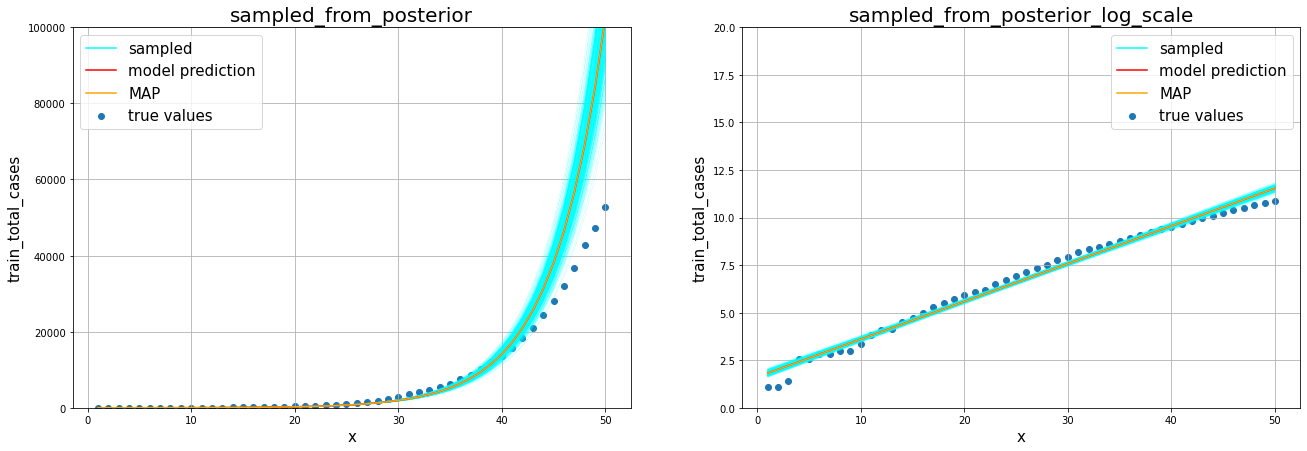

In [18]:
limits = [1e5, 20]
sample_from_posterior(post_mu, post_sigma, x_train, total_cases_train, pred_train_exp, limits, 'train_total_cases', n=400)

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º—ã –ø–æ–ª—É—á–∏–ª–∏ –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å –ú–ê–†, —Å–æ–≤–ø–∞–¥–∞—é—â–∏–º —Å –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª—å—é. –¢–∞–∫–∂–µ –≤–∏–¥–Ω–æ, —á—Ç–æ —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º $x$ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è —Ä–∞–∑–±—Ä–æ—Å $y$, —Ç–æ –µ—Å—Ç—å –º–æ–¥–µ–ª—å –º–µ–Ω—å—à–µ —É–≤–µ—Ä–µ–Ω–∞ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö.

–¢–µ–ø–µ—Ä—å –ø–æ–ø—Ä–æ–±—É–µ–º —Å–¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è, –¥–ª—è —ç—Ç–æ–≥–æ —Å—ç–º–ø–ª–∏—Ä—É–µ–º —ç–∫—Å–ø–æ–Ω–µ–Ω—Ç—ã –∏ –Ω–∞ –Ω–∏—Ö —Å–¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ —Ç–µ—Å—Ç–µ.

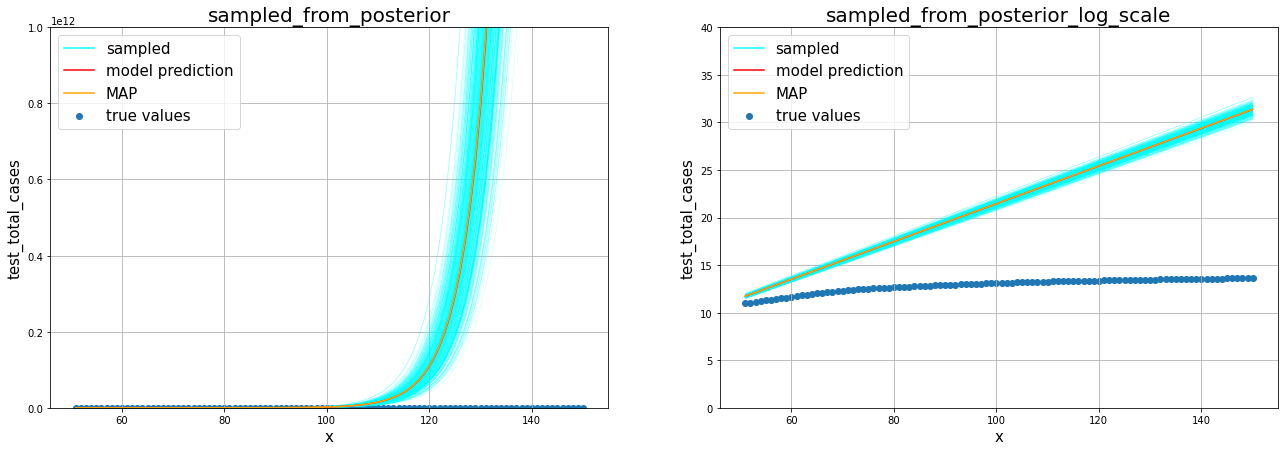

In [19]:
limits = [1e12, 40]
sample_from_posterior(post_mu, post_sigma, x_test, total_cases_test, pred_test_exp, limits, 'test_total_cases', n=400)

–û—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ –∑–¥–µ—Å—å —Å–∏—Ç—É–∞—Ü–∏—è –±—É–¥–µ—Ç —Ç–∞–∫–æ–π –∂–µ –ø–ª–∞—á–µ–≤–Ω–æ–π, –∫–∞–∫ –∏ —Å –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª—å—é. –≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä—É—é –º—ã –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏–ª–∏, –æ–±–ª–∞–¥–∞–µ—Ç –ø–ª–æ—Ö–æ–π –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω–æ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å—é.

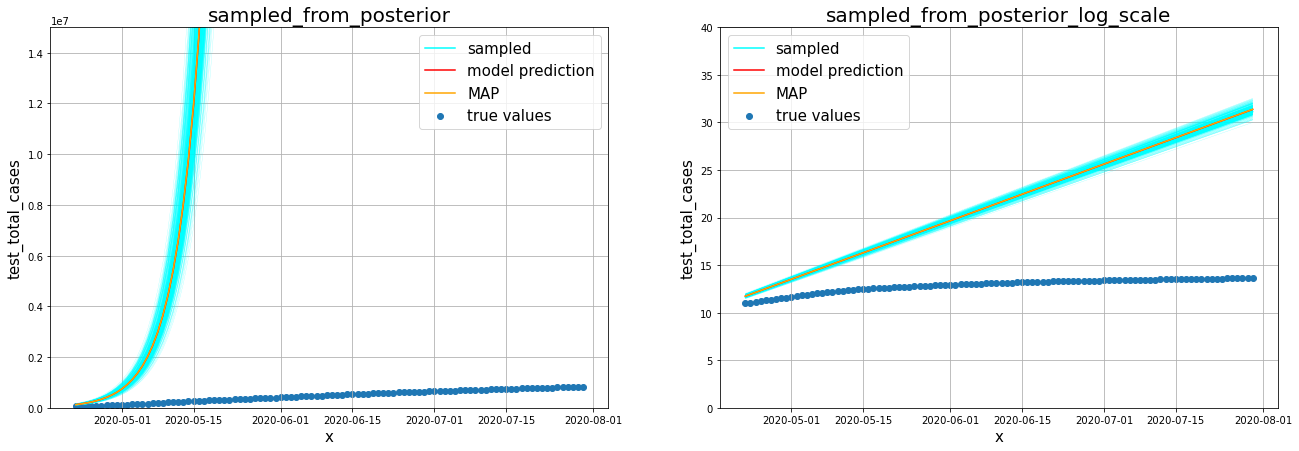

In [20]:
limits = [1.5e7, 40]
sample_from_posterior(post_mu, post_sigma, x_test, total_cases_test, pred_test_exp, 
                      limits, 'test_total_cases', dates=dates_test, n=400)

–ï—Å–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –º–æ–¥–µ–ª—å –Ω–∞ –Ω–∞—á–∞–ª–æ –º–∞—è/–∏—é–Ω—è, —Ç–æ —É–≤–∏–¥–∏–º, —á—Ç–æ —Ç–∞–º –∫–∞–∫–∏–µ-—Ç–æ –∑–∞–æ–±–ª–∞—á–Ω—ã–µ —Ü–∏—Ñ—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ –ø—Ä–µ–≤—ã—à–∞—é—Ç —á–∏—Å–ª–µ–Ω–Ω–æ—Å—Ç—å –Ω–∞—Å–µ–ª–µ–Ω–∏—è –†–æ—Å—Å–∏–∏.

# 3. –°–∏–≥–º–æ–∏–¥–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å.

–ü–æ —Å—É—Ç–∏, —Å–∏–≥–º–æ–∏–¥–∞, –∫–æ—Ç–æ—Ä—É—é –º—ã –≤—ã–±—Ä–∞–ª–∏, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –∫—É–º—É–ª—è—Ç–∏–≤–Ω—É—é —Å—É–º–º—É –∑–Ω–∞—á–µ–Ω–∏–π —ç–∫—Å–ø–æ–Ω–µ–Ω—Ç—ã –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏. –í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ —Å–∏–≥–º–æ–∏–¥–æ–π –¥–æ–ª–∂–Ω–∞ –æ–ø–∏—Å—ã–≤–∞—Ç—å—Å—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è `total_cases`. –û–Ω–∞ —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –æ—á–µ–≤–∏–¥–Ω–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –∏–∑ —Å–µ–±—è –∫—É–º—É–ª—è—Ç–∏–≤–Ω—É—é —Å—É–º–º—É –∑–Ω–∞—á–µ–Ω–∏–π `new_cases`, —Ç.–µ. —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å —Å–∏–≥–º–æ–∏–¥–∞–ª—å–Ω—É—é —Ñ—É–Ω–∫—Ü–∏–∏ –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –∑–∞—Ä–∞–∂–µ–Ω–Ω—ã—Ö, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ–±—É—á–∏—Ç—å –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é —Å —Ç–∞—Ä–≥–µ—Ç–æ–º `new_cases`. –ú–æ–¥–µ–ª—å –±—É–¥–µ—Ç –∏–º–µ—Ç—å –≤–∏–¥:

$$
y_{new\_cases} = exp(w_0 + x*w_1 + x^2*w_2) \\ 
ln(y_{new\_cases}) = ln(exp(w_0 + x*w_1 + x^2*w_2)) \\
ln(y_{new\_cases}) = w_0 + x*w_1 + x^2*w_2
$$

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, $y_{new\_cases}$ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –∏–∑ —Å–µ–±—è —ç–∫—Å–ø–æ–Ω–µ–Ω—Ç—É –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –æ—Ç $x$.

–°—Ç–æ–∏—Ç —É—Ç–æ—á–Ω–∏—Ç—å, —á—Ç–æ –≤ —Å–∞–º–æ–º –Ω–∞—á–∞–ª–µ –º—ã –∑–∞–º–µ–Ω–∏–ª–∏ –≤—Å–µ 0 –¥–ª—è `new_cases` –Ω–∞ 1, —ç—Ç–æ –ø—Ä–∏–≤–µ–ª–æ –∫ —Ç–æ–º—É, —á—Ç–æ –∫—É–º—É–ª—è—Ç–∏–≤–Ω–∞—è —Å—É–º–º–∞ `new_cases` –∏ —Ä–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è `total_cases` –Ω–µ –±—É–¥—É—Ç —Å–æ–≤–ø–∞–¥–∞—Ç—å, –æ–¥–Ω–∞–∫–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –æ—á–µ–Ω—å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ, –ø–æ—ç—Ç–æ–º—É –ø—Ä–µ–¥–ª–∞–≥–∞—é –Ω–µ –ø–µ—Ä–µ—Å—á–∏—Ç—ã–≤–∞—Ç—å `total_cases`.

### 3.1 –û–±—É—á–µ–Ω–∏–µ —Å–∏–≥–º–æ–∏–¥–∞–ª—å–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–∏.

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–∞—Ä–≥–µ—Ç–∞ `new_cases`.

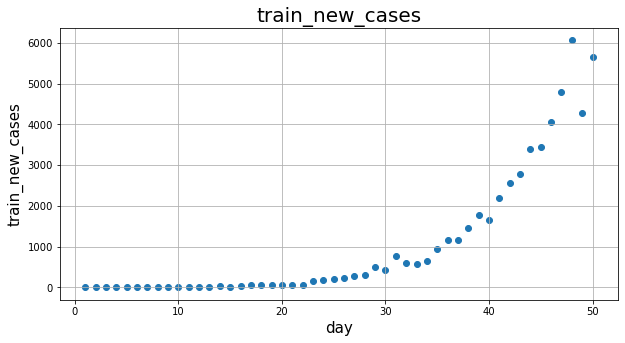

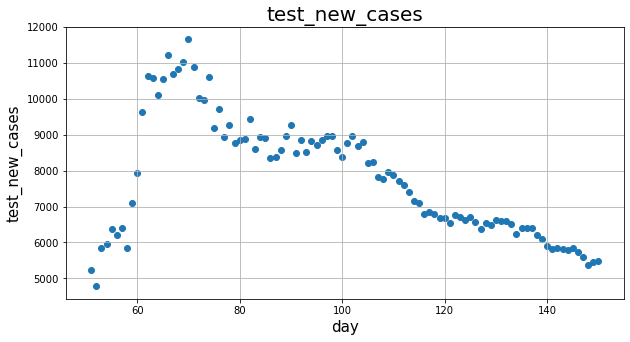

In [21]:
plot_target(x_train, new_cases_train, 'train_new_cases')
plot_target(x_test, new_cases_test, 'test_new_cases')

In [22]:
x_train_sigma = np.hstack((x_train, x_train ** 2))
x_test_sigma = np.hstack((x_test, x_test ** 2))

In [23]:
model_sigma = LinearRegression().fit(x_train_sigma, np.log(new_cases_train))

In [24]:
pred_train_sigma = np.exp(model_sigma.predict((x_train_sigma)))
pred_test_sigma = np.exp(model_sigma.predict((x_test_sigma)))

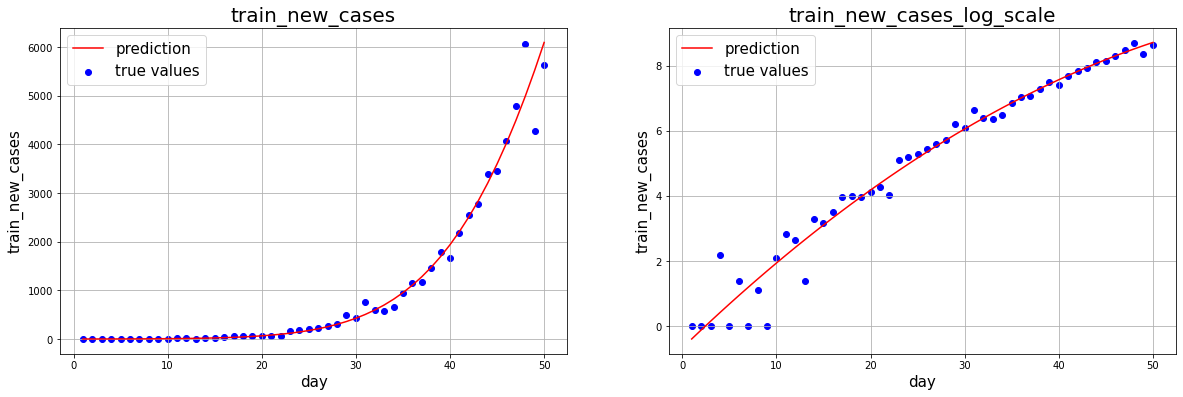

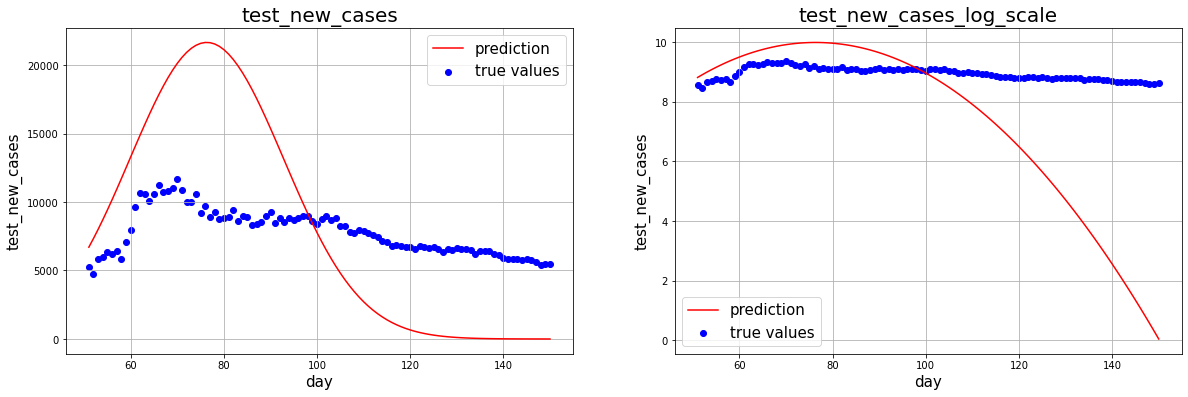

In [25]:
plot_target_model(x_train[:, 0], new_cases_train, pred_train_sigma, 'train_new_cases')
plot_target_model(x_test[:, 0], new_cases_test, pred_test_sigma, 'test_new_cases')

–ü–æ–ª—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É –∏ –Ω–∞ —Ç–µ—Å—Ç–µ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ —Ñ—É–Ω–∫—Ü–∏—è –∏–º–µ–µ—Ç —Ñ–æ—Ä–º—É —Ö–æ–ª–º–∏–∫–∞. –≠—Ç–æ —Å–æ–≥–ª–∞—Å—É–µ—Ç—Å—è —Å —Ç–µ–º, —á—Ç–æ –Ω–∞ –Ω–∞—á–∞–ª—å–Ω—ã—Ö —ç—Ç–∞–ø–∞—Ö —ç–ø–∏–¥–µ–º–∏–∏ —á–∏—Å–ª–æ –Ω–æ–≤—ã—Ö –∑–∞–±–æ–ª–µ–≤—à–∏—Ö —Ä–∞—Å—Ç–µ—Ç, –¥–æ—Å—Ç–∏–≥–∞–µ—Ç –ø–∏–∫–∞ –∏ –ø–æ—Ç–æ–º –∏–¥–µ—Ç –Ω–∞ —Å–ø–∞–¥. –ú–æ–¥–µ–ª—å –Ω–µ –∏–¥–µ–∞–ª—å–Ω–æ, –Ω–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç —ç—Ç—É —Ç–µ–Ω–¥–µ–Ω—Ü–∏—é. –¢–µ–ø–µ—Ä—å —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º `total_cases`.

In [26]:
pred_train_sigma_total = np.cumsum(pred_train_sigma)
pred_test_sigma_total = np.cumsum(pred_test_sigma)

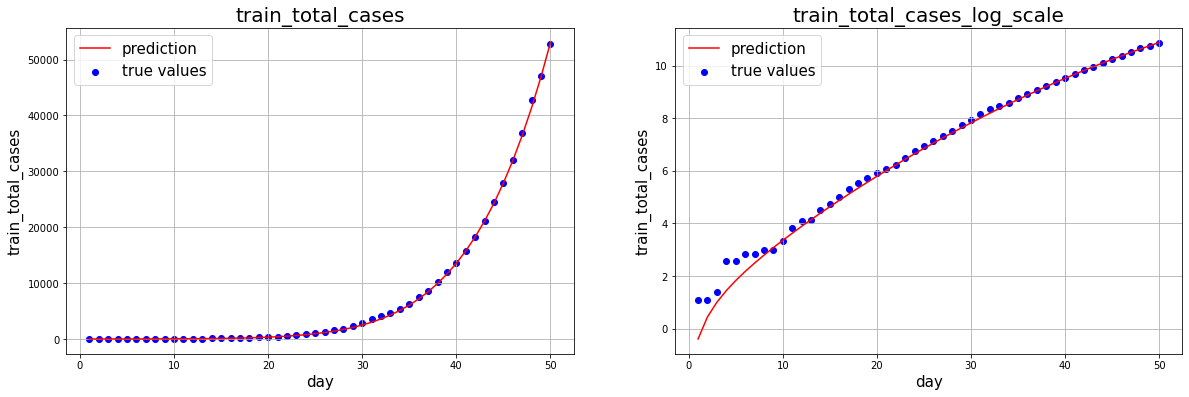

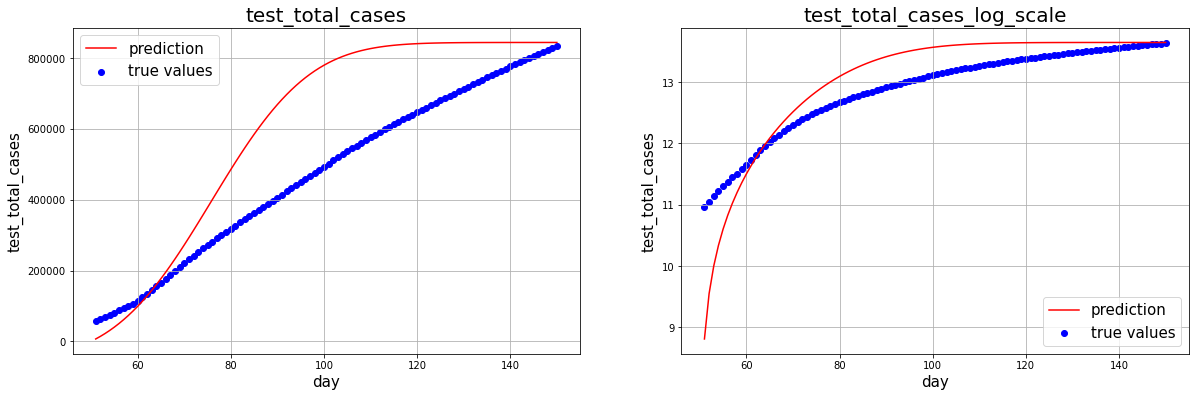

In [27]:
plot_target_model(x_train[:, 0], total_cases_train, pred_train_sigma_total, 'train_total_cases')
plot_target_model(x_test[:, 0], total_cases_test, pred_test_sigma_total, 'test_total_cases')

–°—Ä–∞–≤–Ω–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏. –í–æ-–ø–µ—Ä–≤—ã—Ö, –º–æ–¥–µ–ª—å –∏–¥–µ–∞–ª—å–Ω–æ –æ–ø–∏—Å—ã–≤–∞–µ—Ç —Ç—Ä–µ–π–Ω–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É, –≤–æ-–≤—Ç–æ—Ä—ã—Ö, –º—ã –ø–æ–ª—É—á–∞–µ–º —Å–∏–≥–º–æ–∏–¥—É, –∫–æ—Ç–æ—Ä–∞—è –ª—É—á—à–µ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –¥–∏–Ω–∞–º–∏–∫—É —Ä–æ—Å—Ç–∞ –∑–∞–±–æ–ª–µ–≤—à–∏—Ö –Ω–∞ —Ç–µ—Å—Ç–µ. –ö–æ–Ω–µ—á–Ω–æ, –µ—Å–ª–∏ –º—ã –≤–æ–∑—å–º–µ–º –µ—â–µ –Ω–∞ 100 –¥–Ω–µ–π –≤–ø–µ—Ä–µ–¥, —Å–∏–≥–º–æ–∏–¥–∞ –æ—Å—Ç–∞–Ω–µ—Ç—Å—è –Ω–∞ –ø–ª–∞—Ç–æ, –∞ —á–∏—Å–ª–æ –∑–∞–±–æ–ª–µ–≤—à–∏—Ö –±—É–¥–µ—Ç —Ä–∞—Å—Ç–∏ (—Å–ª–µ–¥—É—é—â–∏–µ –≤–æ–ª–Ω—ã), –æ–¥–Ω–∞–∫–æ –¥–∞–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç—Å—è –≤ –ø–µ—Ä–¥–µ–ª–∞—Ö –æ–¥–Ω–æ–π –≤–æ–ª–Ω—ã.

# 3.2 –ü–æ–∏—Å–∫ –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

–ü—Ä–æ—Ü–µ—Å—Å –ø–æ–∏—Å–∫–∞ –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏–¥–µ–Ω—Ç–∏—á–µ–Ω —ç—Ç–æ–º—É –ø—Ä–æ—Ü–µ—Å—Å—É –¥–ª—è —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏, –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ —Ä–∞–∑–ª–∏—á–∏–µ –≤ —Ç–æ–º, —á—Ç–æ –∑–¥–µ—Å—å –º—ã –∞–ø–ø—Ä–æ–∫—Å–∏–º–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å –¥–ª—è `new_cases`, –∞ —É–∂–µ –ø–æ—Ç–æ–º –ø–æ–ª—É—á–∞–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è `total_cases`.

–ê–ø—Ä–∏–æ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–∞–¥–∞–¥–∏–º –∫–∞–∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å —Ç–µ–º–∏ –∂–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –Ω–æ —É–∂–µ —Ç—Ä–µ—Ö–º–µ—Ä–Ω–æ–µ.

In [28]:
proir_mu = np.array([0, 0, 0]) 
proir_sigma = 5 * np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
w_0 = model_sigma.intercept_
w_1, w_2 = model_sigma.coef_
z_model_sigma = multivariate_normal.pdf([w_0, w_1, w_2], mean=proir_mu, cov=proir_sigma)
print(f'–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –≤–µ—Å–æ–≤ –º–æ–¥–µ–ª–∏ –≤ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–∏–∏ —Å –∞–ø—Ä–∏–æ—Ä–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: {z_model_sigma:.5f}')

–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –≤–µ—Å–æ–≤ –º–æ–¥–µ–ª–∏ –≤ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–∏–∏ —Å –∞–ø—Ä–∏–æ—Ä–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: 0.00538


–ú–æ–∂–µ–º —Ç–∞–∫ –∂–µ –ø–æ—Å–µ–º–ø–ª–∏—Ä–æ–≤–∞—Ç—å –∏–∑ —ç—Ç–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

<Figure size 864x432 with 0 Axes>

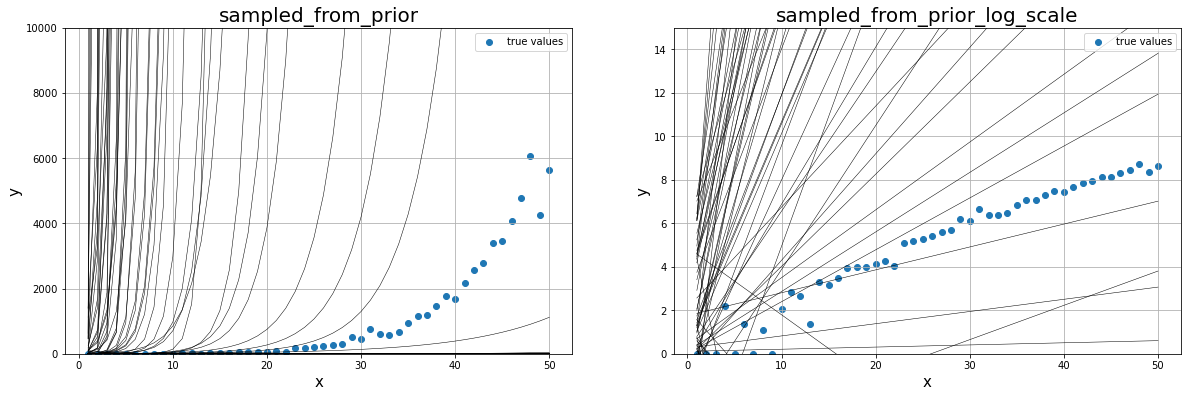

In [29]:
limits = [1e4, 15]
plt.figure(figsize=(12, 6))
sample_lines(proir_mu, proir_sigma, x_train, new_cases_train, limits, 100)

–¢–∞–∫–∏–º –∂–µ –æ–±—Ä–∞–∑–æ–º –æ—Ü–µ–Ω–∏–≤–∞–µ–º –¥–∏—Å–ø–µ—Ä—Å–∏—é —à—É–º–∞.

In [30]:
std_noise = np.std(np.log(new_cases_train) - np.log(pred_train_sigma))
print(f'–î–∏—Å–ø–µ—Ä—Å–∏—è —à—É–º–∞: {std_noise ** 2}')

–î–∏—Å–ø–µ—Ä—Å–∏—è —à—É–º–∞: 0.23928684127005564


–¢–µ–ø–µ—Ä—å –ø—É—Ç–µ–º –ø–µ—Ä–µ–º–Ω–æ–∂–µ–Ω–∏—è –∞–ø—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–∏—è –≤—Å–µ—Ö —Ç–æ—á–µ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø–æ–ª—É—á–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

In [31]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    x_matrix = np.array([[1, x[0], x[0]**2]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.log(np.array([y]))))
    return mu_n, sigma_n

In [32]:
post_mu, post_sigma = proir_mu, proir_sigma.copy()
for x, y in zip(x_train, new_cases_train):
    post_mu, post_sigma = bayesian_update(post_mu, post_sigma, x, y, std_noise)

In [33]:
print(f'–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏: \n w_0 = {w_0:.4f} \n w_1 = {w_1:.4f} \n w_2 = {w_2:.4f}\n\n')
print(f'–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (MAP): \n w_0 = {post_mu[0]:.4f} \n w_1 = {post_mu[1]:.4f} \n w_2 = {post_mu[2]:.4f}')

–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏: 
 w_0 = -0.6740 
 w_1 = 0.2793 
 w_2 = -0.0018


–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (MAP): 
 w_0 = -0.6676 
 w_1 = 0.2788 
 w_2 = -0.0018


–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ –∏ –ú–ê–† –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à–æ —Å–æ–æ—Ç–Ω–æ—Å—è—Ç—Å—è.

### 3.3 –ü—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ 

–¢–µ–ø–µ—Ä—å –ø–æ—Å–µ–º–ø–ª–∏—Ä—É–µ–º –º–Ω–æ–∂–µ—Å—Ç–≤–æ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ç –∏–∑ –ø–æ–ª—É—á–∏–≤—à–µ–≥–æ—Å—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. MAP –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —è–≤–ª—è–µ—Ç—Å—è  ùúá , —Ç–∞–∫ –∫–∞–∫ –º—ã –≤–∑—è–ª–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–≥–æ.

In [34]:
def sample_from_posterior_new_cases(mu, sigma, x, y, pred, limits, title, dates=None, n=20):
    if dates is not None:
        x_axis = dates
    else:
        x_axis = x
    my_w = np.random.multivariate_normal(mu, sigma, n)
    fig, ax = plt.subplots(1, 2, figsize=(22, 7))
    for i in range(2):
        if i == 0:
            for j, w in enumerate(my_w):
                if j == 0:
                    ax[i].plot(x_axis, np.exp(w[0] + w[1]*x + w[2]*x**2), 'aqua', label='sampled')
                else:
                    ax[i].plot(x_axis, np.exp(w[0] + w[1]*x + w[2]*x**2), 'aqua', lw=0.3, alpha=0.4)
            ax[i].scatter(x_axis, y, label='true values')
            ax[i].plot(x_axis, pred, c='r', label='model prediction')
            ax[i].plot(x_axis, np.exp(mu[0] + mu[1]*x + mu[2]*x**2), c='orange', label='MAP')
            ax[i].set_ylim(0, limits[0])
            ax[i].set_title('sampled_from_posterior', fontsize=20)
        else:
            for j, w in enumerate(my_w):
                if j == 0:
                    ax[i].plot(x_axis, w[0] + w[1]*x + w[2]*x**2, 'aqua', label='sampled')
                else:
                    ax[i].plot(x_axis, w[0] + w[1]*x + w[2]*x**2, 'aqua', lw=0.3, alpha=0.4)
            ax[i].scatter(x_axis, np.log(y), label='true values')
            ax[i].plot(x_axis, np.log(pred), c='r', label='model prediction')
            ax[i].plot(x_axis, mu[0] + mu[1]*x + mu[2]*x**2, c='orange', label='MAP')
            ax[i].set_ylim(0, limits[1])
            ax[i].set_title('sampled_from_posterior_log_scale', fontsize=20)
        ax[i].set_xlabel('x', fontsize=15)
        ax[i].set_ylabel(title, fontsize=15)
        ax[i].grid()
        ax[i].legend(fontsize=15)

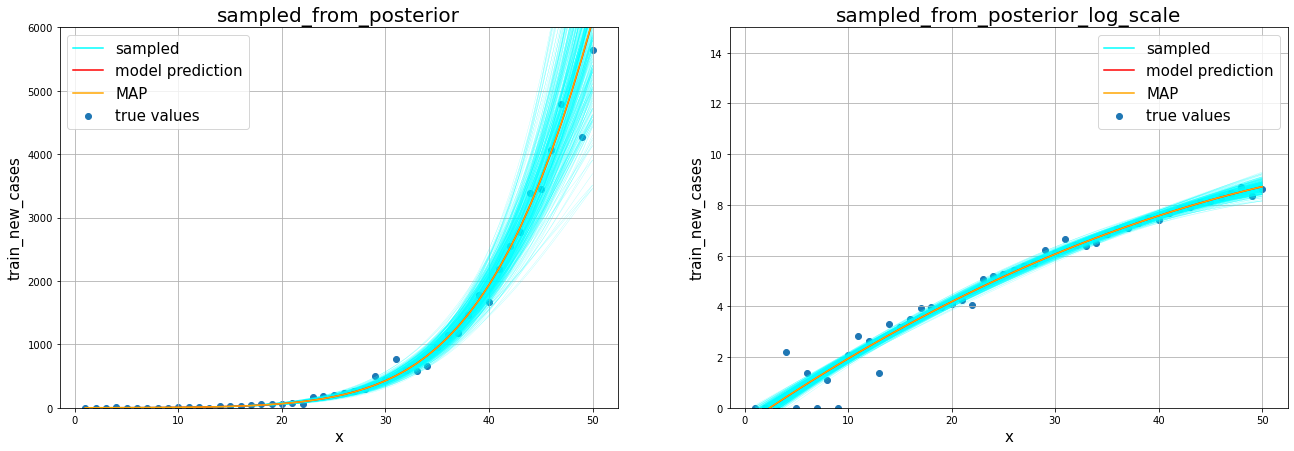

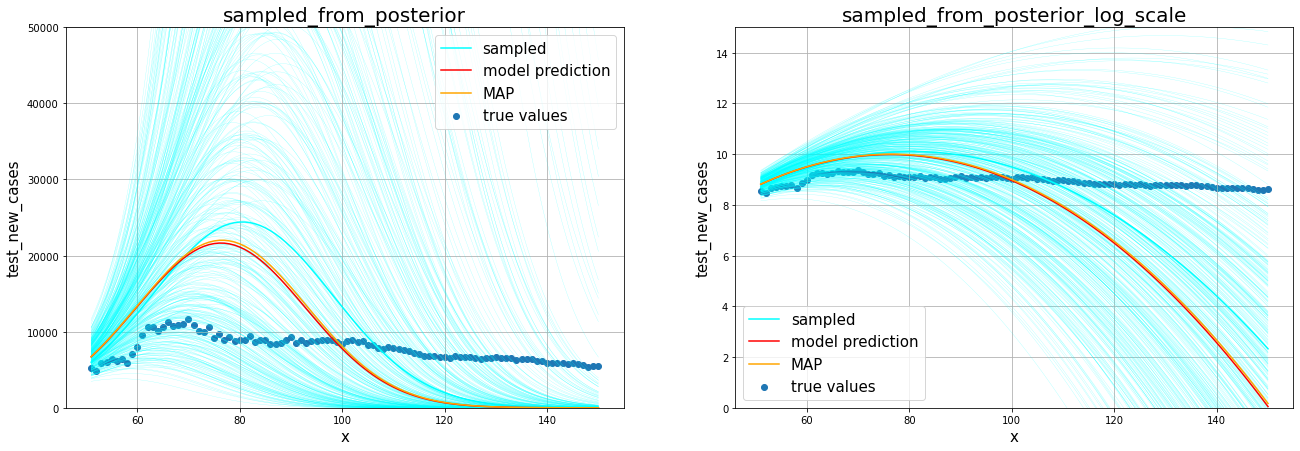

In [35]:
limits = [6e3, 15]
sample_from_posterior_new_cases(post_mu, post_sigma, x_train, new_cases_train, pred_train_sigma, 
                                limits, 'train_new_cases', n=400)
limits = [5e4, 15]
sample_from_posterior_new_cases(post_mu, post_sigma, x_test, new_cases_test, pred_test_sigma, 
                                limits, 'test_new_cases', n=400)

In [36]:
def sample_from_posterior_total_cases(mu, sigma, x, y, pred, limits, title, dates=None, n=20):
    if dates is not None:
        x_axis = dates
    else:
        x_axis = x
    my_w = np.random.multivariate_normal(mu, sigma, n)
    fig, ax = plt.subplots(1, 2, figsize=(22, 7))
    for i in range(2):
        if i == 0:
            for j, w in enumerate(my_w):
                if j == 0:
                    ax[i].plot(x_axis, np.cumsum(np.exp(w[0] + w[1]*x + w[2]*x**2)), 'aqua', label='sampled')
                else:
                    ax[i].plot(x_axis, np.cumsum(np.exp(w[0] + w[1]*x + w[2]*x**2)), 'aqua', lw=0.3, alpha=0.4)
            ax[i].scatter(x_axis, y, label='true values')
            ax[i].plot(x_axis, pred, c='r', label='model prediction')
            ax[i].plot(x_axis, np.cumsum(np.exp(mu[0] + mu[1]*x + mu[2]*x**2)), c='orange', label='MAP')
            ax[i].set_ylim(0, limits[0])
            ax[i].set_title('sampled_from_posterior', fontsize=20)
        else:
            for j, w in enumerate(my_w):
                if j == 0:
                    ax[i].plot(x_axis, np.log(np.cumsum(np.exp(w[0] + w[1]*x + w[2]*x**2))), 'aqua', label='sampled')
                else:
                    ax[i].plot(x_axis, np.log(np.cumsum(np.exp(w[0] + w[1]*x + w[2]*x**2))), 'aqua', lw=0.3, alpha=0.4)
            ax[i].scatter(x_axis, np.log(y), label='true values')
            ax[i].plot(x_axis, np.log(pred), c='r', label='model prediction')
            ax[i].plot(x_axis, np.log(np.cumsum(np.exp(w[0] + w[1]*x + w[2]*x**2))), c='orange', label='MAP')
            ax[i].set_ylim(0, limits[1])
            ax[i].set_title('sampled_from_posterior_log_scale', fontsize=20)
        ax[i].set_xlabel('x', fontsize=15)
        ax[i].set_ylabel(title, fontsize=15)
        ax[i].grid()
        ax[i].legend(fontsize=15)

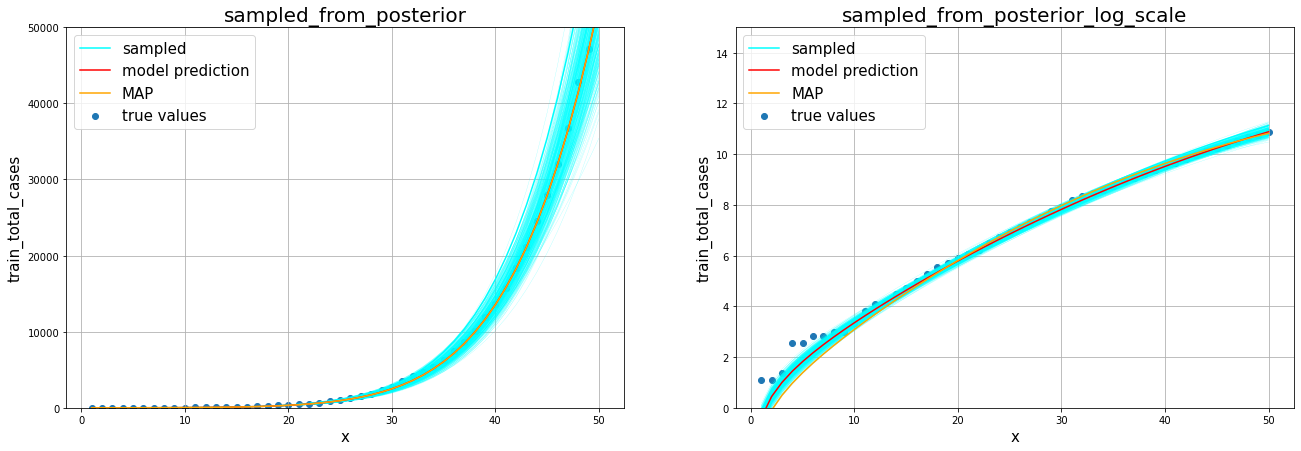

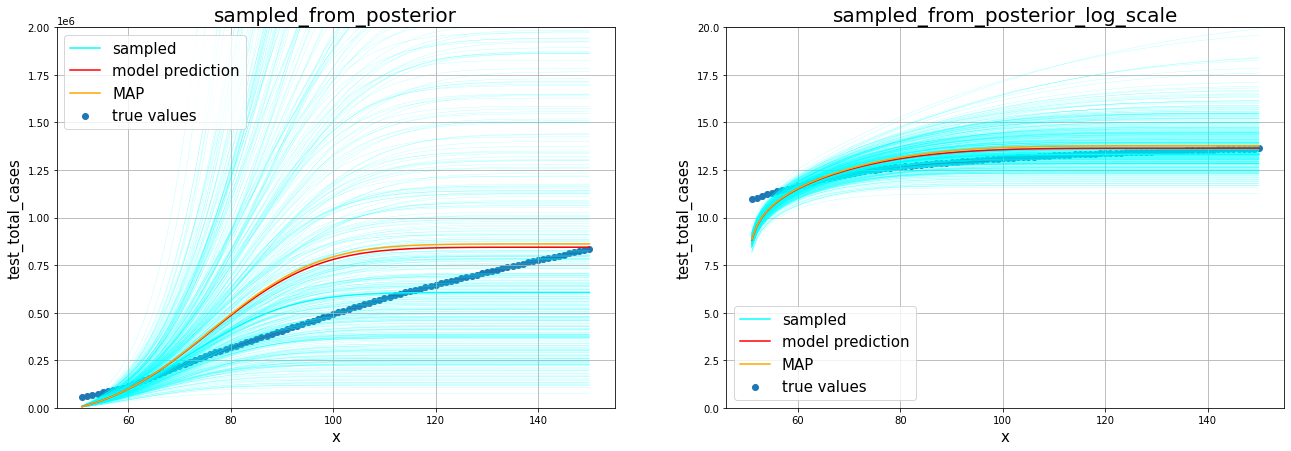

In [37]:
limits = [5e4, 15]
sample_from_posterior_total_cases(post_mu, post_sigma, x_train, total_cases_train, pred_train_sigma_total,
                                  limits, 'train_total_cases', n=400)
limits = [2e6, 20]
sample_from_posterior_total_cases(post_mu, post_sigma, x_test, total_cases_test, pred_test_sigma_total,
                                  limits, 'test_total_cases', n=400)

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –ø–æ–ª—É—á–∞–µ–º, —á—Ç–æ –º–æ–¥–µ–ª—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —É–≤–µ—Ä–µ–Ω–Ω–∞ –≤ —Å–≤–æ–∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö –Ω–∞ —Ç—Ä–µ–π–Ω–µ, –Ω–æ –Ω–∞ —Ç–µ—Å—Ç–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ª–µ–∂–∞—Ç –≤ —à–∏—Ä–æ–∫–æ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ, –¥–∏—Å–ø–µ—Ä—Å–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –≤—ã—Å–æ–∫–∞—è. –ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –¥–ª—è `total_cases` –∞–ø–æ—Å—Ç–µ—Ä–∏–æ—Ä–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ—Ö–æ–∂–µ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Å –¥–ª–∏–Ω–Ω—ã–º —Ö–≤–æ—Å—Ç–æ–º. –†–∞—Å—Å–º–æ—Ç—Ä–∏–º —ç—Ç–æ –±–æ–ª–µ–µ –ø–æ–¥—Ä–æ–±–Ω–æ –∏ –ø–æ—Å—Ç—Ä–æ–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –¥–Ω—è. –°–¥–µ–ª–∞–µ–º –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –º–∞–π/–∏—é–Ω—å –≤ –ø–µ—Å—Å–∏–º–∏—Å—Ç–∏—á–Ω–æ–º –∏ –æ–ø—Ç–∏–º–∏—Å—Ç—á–∏–Ω–æ–º —Å—Ü–µ–Ω–∞—Ä–∏—è—Ö (90-–π –∏ 10-–π –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ).

In [38]:
may_id = np.where(dates_test == pd.to_datetime('2020-05-01'))[0][0]
june_id = np.where(dates_test == pd.to_datetime('2020-06-01'))[0][0]

In [39]:
true_may = total_cases_test[may_id]
true_june = total_cases_test[june_id]
may_x = x_test[may_id]
june_x = x_test[june_id]

In [40]:
def sample_total_cases(mu, sigma, x, n):
    samples = []
    my_w = np.random.multivariate_normal(mu, sigma, n)
    for w in my_w:
        samples.append(np.cumsum(np.exp(w[0] + w[1]*x + w[2]*x**2))[0])
    return np.array(samples)

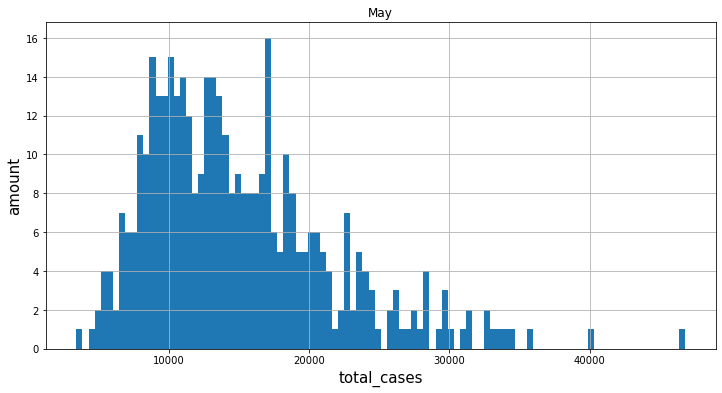

In [41]:
may_samples = sample_total_cases(post_mu, post_sigma, may_x, 400)
plt.figure(figsize=(12, 6))
_ = plt.hist(may_samples, bins=100)
plt.xlabel('total_cases', fontsize=15)
plt.ylabel('amount', fontsize=15)
plt.title('May')
plt.grid()

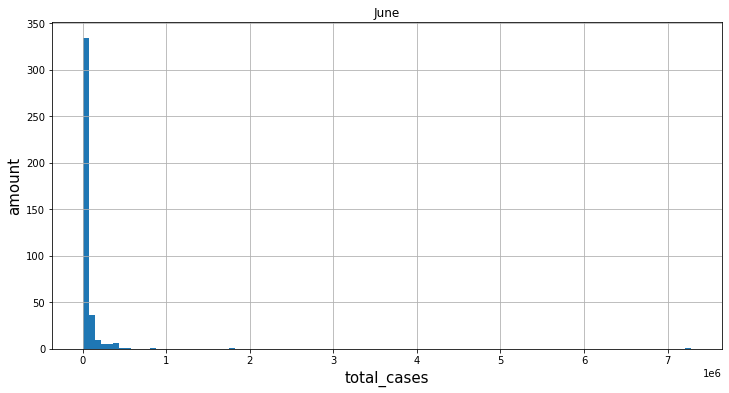

In [42]:
june_samples = sample_total_cases(post_mu, post_sigma, june_x, 400)
plt.figure(figsize=(12, 6))
_ = plt.hist(june_samples, bins=100)
plt.xlabel('total_cases', fontsize=15)
plt.ylabel('amount', fontsize=15)
plt.title('June')
plt.grid()

In [43]:
percentile_90_may, percentile_10_may = np.round(np.percentile(may_samples, [90, 10]))
percentile_90_june, percentile_10_june = np.round(np.percentile(june_samples, [90, 10]))

In [44]:
print('–ú–∞–π')
print(f'–†–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {true_may}')
print(f'–û–ø—Ç–∏–º–∏—Å—Ç–∏—á–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑: {percentile_10_may}')
print(f'–ü–µ—Å—Å–∏–º–∏—Å—Ç–∏—á–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑: {percentile_90_may}\n')

print('–ò—é–Ω—å')
print(f'–†–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {true_june}')
print(f'–û–ø—Ç–∏–º–∏—Å—Ç–∏—á–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑: {percentile_10_june}')
print(f'–ü–µ—Å—Å–∏–º–∏—Å—Ç–∏—á–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑: {percentile_90_june}')

–ú–∞–π
–†–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 114431.0
–û–ø—Ç–∏–º–∏—Å—Ç–∏—á–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑: 8111.0
–ü–µ—Å—Å–∏–º–∏—Å—Ç–∏—á–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑: 23785.0

–ò—é–Ω—å
–†–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 414328.0
–û–ø—Ç–∏–º–∏—Å—Ç–∏—á–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑: 2037.0
–ü–µ—Å—Å–∏–º–∏—Å—Ç–∏—á–Ω—ã–π –ø—Ä–æ–≥–Ω–æ–∑: 120092.0


–ü–æ—Å—Ç—Ä–æ–∏–≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –≤–∏–¥–Ω–æ, —á—Ç–æ –¥–ª—è –º–∞—è –æ–Ω–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Å –¥–ª–∏–Ω–Ω—ã–º —Ö–≤–æ—Å—Ç–æ–º, –∞ –¥–ª—è –∏—é–Ω—è –±–æ–ª—å—à–µ –ø–æ—Ö–æ–∂–µ –Ω–∞ –∫–∞–∫–æ–µ-—Ç–æ —Å—Ç–µ–ø–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –û–±–∞ –ø—Ä–æ–≥–Ω–æ–∑–∞ –æ–∫–∞–∑–∞–ª–∏—Å—å –∑–∞–Ω–∏–∂–µ–Ω–Ω—ã–º–∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–µ–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –Ω–æ –≥–æ—Ä–∞–∑–¥–æ –±–ª–∏–∂–µ —á–µ–º –≤ —Å–ª—É—á–∞–µ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏.